In [43]:
import pandas as pd
batting_data = pd.read_csv("all_season_batting_card.csv")

In [44]:
batting_data.describe()

,season,match_id,innings_id,runs,ballsFaced,fours,sixes,runningOver,link
count,15684.000000,1.572000e+04,15720.000000,15714.000000,15714.000000,15714.000000,15714.000000,12029.000000,0.0
mean,2015.588817,8.702637e+05,1.490522,19.418417,15.019028,1.758814,0.748823,11.414847,NaN
std,4.665125,3.544569e+05,0.499926,21.218681,13.592456,2.296097,1.331647,5.986244,NaN
min,2008.000000,3.359820e+05,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,NaN
25%,2012.000000,5.483120e+05,1.000000,3.000000,4.000000,0.000000,0.000000,6.200000,NaN
50%,2015.000000,8.298190e+05,1.000000,12.000000,11.000000,1.000000,0.000000,12.300000,NaN
75%,2020.000000,1.216506e+06,2.000000,28.000000,22.000000,3.000000,1.000000,17.100000,NaN
max,2023.000000,1.370353e+06,2.000000,175.000000,73.000000,19.000000,17.000000,19.600000,NaN


In [45]:
batting_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15720 entries, 0 to 15719
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           15684 non-null  float64
 1   match_id         15720 non-null  int64  
 2   match_name       15720 non-null  object 
 3   home_team        15720 non-null  object 
 4   away_team        15720 non-null  object 
 5   venue            15720 non-null  object 
 6   city             15720 non-null  object 
 7   country          15720 non-null  object 
 8   current_innings  15720 non-null  object 
 9   innings_id       15720 non-null  int64  
 10  name             15720 non-null  object 
 11  fullName         15720 non-null  object 
 12  runs             15714 non-null  float64
 13  ballsFaced       15714 non-null  float64
 14  minutes          15714 non-null  object 
 15  fours            15714 non-null  float64
 16  sixes            15714 non-null  float64
 17  strikeRate  

In [46]:
print(batting_data.index)

RangeIndex(start=0, stop=15720, step=1)


In [47]:
# Check for missing values
print(batting_data.isnull().sum())

# Handle missing values (e.g., imputation, removal)
batting_data = batting_data.dropna(subset=['runs', 'ballsFaced'])  # Remove rows with missing runs or balls faced

# Convert data types if necessary
batting_data['runs'] = pd.to_numeric(batting_data['runs'])
batting_data['ballsFaced'] = pd.to_numeric(batting_data['ballsFaced'])

# Handle outliers (e.g., using Z-score or IQR)
# ... (implement outlier handling techniques if needed)

season                36
match_id               0
match_name             0
home_team              0
away_team              0
venue                  0
city                   0
country                0
current_innings        0
innings_id             0
name                   0
fullName               0
runs                   6
ballsFaced             6
minutes                6
fours                  6
sixes                  6
strikeRate             6
captain                0
isNotOut               6
runningScore           6
runningOver         3691
shortText              0
commentary          3694
link               15720
dtype: int64


In [48]:
batting_data['batting_average'] = batting_data['runs'] / batting_data['ballsFaced']

In [49]:
batting_stats = batting_data[['runs', 'ballsFaced', 'strikeRate', 'batting_average']].describe()
print(batting_stats)

               runs    ballsFaced  batting_average
count  15714.000000  15714.000000     15396.000000
mean      19.418417     15.019028         1.115651
std       21.218681     13.592456         0.674260
min        0.000000      0.000000         0.000000
25%        3.000000      4.000000         0.666667
50%       12.000000     11.000000         1.100000
75%       28.000000     22.000000         1.500000
max      175.000000     73.000000         6.000000


In [50]:
top_10_batsmen_by_runs = batting_data.nlargest(10, 'runs')
top_10_batsmen_by_runs

#top_10_batsmen_by_strike_rate = batting_data.nlargest(10, 'strikeRate')
#print(top_10_batsmen_by_strike_rate)

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,commentary,link,batting_average
10084,2013.0,598027,RCB v PWI,RCB,PWI,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,...,17.0,265.15,False,True,{},NaN,not out,NaN,NaN,2.651515
14826,2008.0,335982,RCB v KKR,RCB,KKR,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,KKR,1,...,13.0,216.43,False,True,{},NaN,not out,NaN,NaN,2.164384
2230,2022.0,1304112,KKR v LSG,KKR,LSG,"Dr DY Patil Sports Academy, Navi Mumbai",Navi Mumbai,India,LSG,1,...,10.0,200.00,False,True,{},NaN,not out,NaN,NaN,2.000000
8483,2015.0,829795,MI v RCB,MI,RCB,"Wankhede Stadium, Mumbai",Mumbai,India,RCB,1,...,4.0,225.42,False,True,{},NaN,not out,NaN,NaN,2.254237
3379,2020.0,1216510,KXIP v RCB,KXIP,RCB,Dubai International Cricket Stadium,Dubai,United Arab Emirates,KXIP,1,...,7.0,191.30,True,True,{},NaN,not out,NaN,NaN,1.913043
1154,2023.0,1370352,GT v MI,GT,MI,"Narendra Modi Stadium, Motera, Ahmedabad",Ahmedabad,India,GT,1,...,10.0,215.00,False,False,"{'wickets': 2, 'runs': 192}",16.5,c David b Madhwal,Madhwal has Gill holing out. <strong>End of a ...,NaN,2.150000
7550,2016.0,980987,RCB v GL,RCB,GL,"M.Chinnaswamy Stadium, Bengaluru",Bengaluru,India,RCB,1,...,12.0,248.07,False,True,{},NaN,not out,NaN,NaN,2.480769
5728,2018.0,1136602,DC v SRH,DC,SRH,"Arun Jaitley Stadium, Delhi",Delhi,India,DC,1,...,7.0,203.17,False,True,{},NaN,not out,NaN,NaN,2.031746
11757,2012.0,548372,DC v RCB,DC,RCB,"Arun Jaitley Stadium, Delhi",Delhi,India,RCB,1,...,13.0,206.45,False,True,{},NaN,not out,NaN,NaN,2.064516
13474,2010.0,419137,CSK v RR,CSK,RR,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,India,CSK,1,...,11.0,226.78,False,False,"{'wickets': 4, 'runs': 241}",19.4,c Fazal b Watson,end of a superb innings from Vijay! Finally he...,NaN,2.267857


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

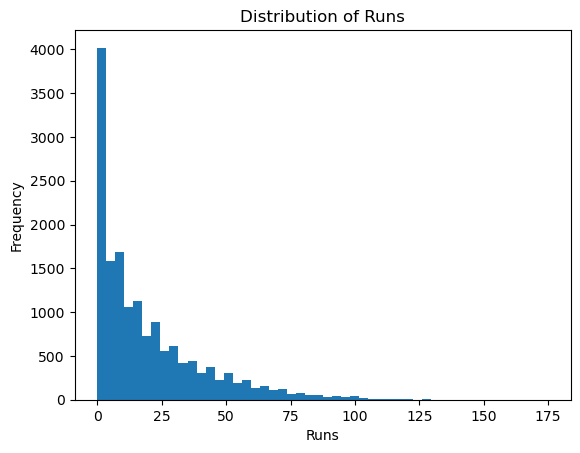

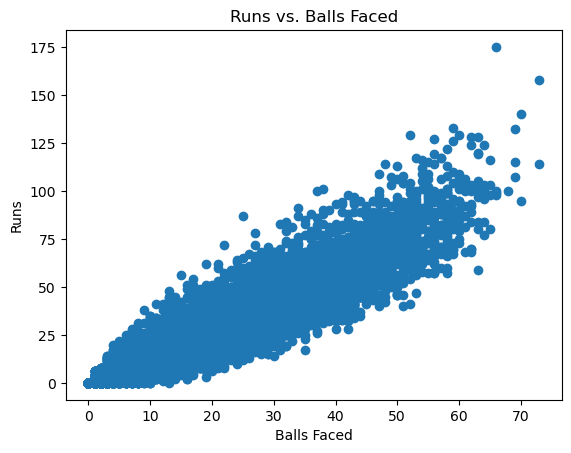

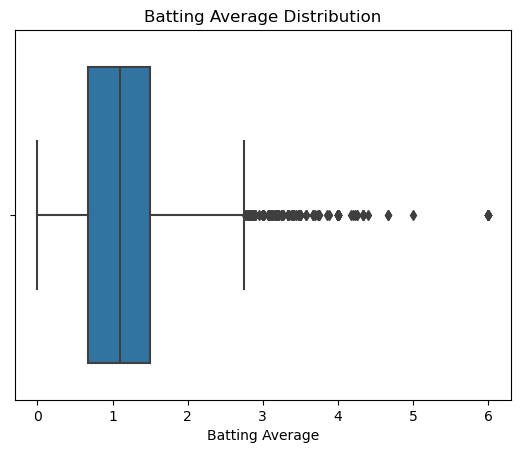

In [52]:
# Histogram of runs
plt.hist(batting_data['runs'], bins=50)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title('Distribution of Runs')
plt.show()

# Scatterplot of runs vs. balls faced
plt.scatter(batting_data['ballsFaced'], batting_data['runs'])
plt.xlabel('Balls Faced')
plt.ylabel('Runs')
plt.title('Runs vs. Balls Faced')
plt.show()

# Boxplot of batting averages
sns.boxplot(x='batting_average', data=batting_data)
plt.xlabel('Batting Average')
plt.title('Batting Average Distribution')
plt.show()

In [53]:
top_10_batsmen_by_runs = batting_data.nlargest(10, 'runs')[['name', 'runs', 'ballsFaced', 'strikeRate', 'batting_average']]
print(top_10_batsmen_by_runs)

                 name   runs  ballsFaced strikeRate  batting_average
10084        CH Gayle  175.0        66.0     265.15         2.651515
14826     BB McCullum  158.0        73.0     216.43         2.164384
2230        Q de Kock  140.0        70.0     200.00         2.000000
8483   AB de Villiers  133.0        59.0     225.42         2.254237
3379         KL Rahul  132.0        69.0     191.30         1.913043
1154     Shubman Gill  129.0        60.0     215.00         2.150000
7550   AB de Villiers  129.0        52.0     248.07         2.480769
5728          RR Pant  128.0        63.0     203.17         2.031746
11757        CH Gayle  128.0        62.0     206.45         2.064516
13474         M Vijay  127.0        56.0     226.78         2.267857


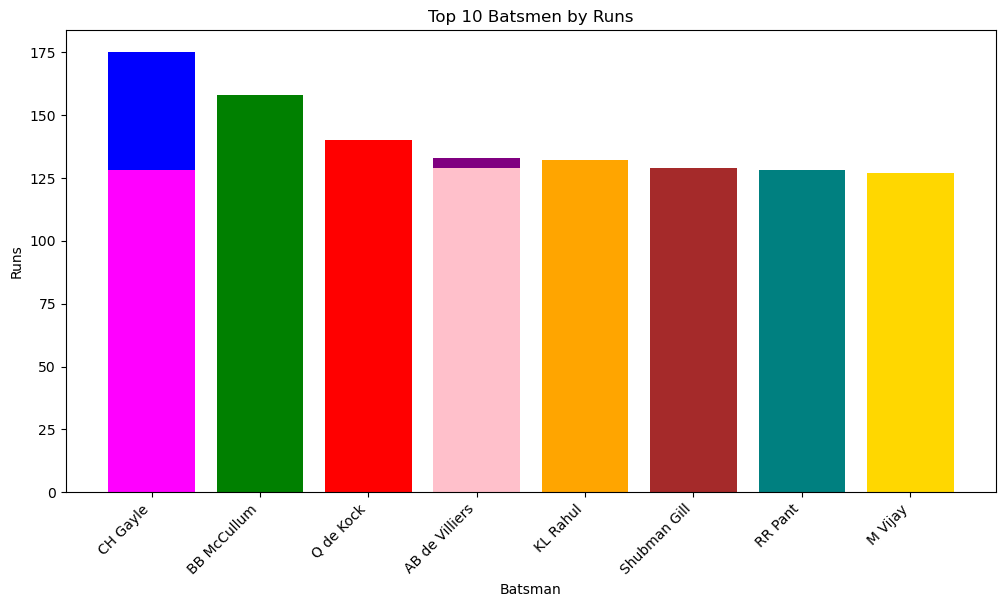

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'batting_data'
top_10_batsmen_by_runs = batting_data.nlargest(10, 'runs')[['name', 'runs', 'ballsFaced', 'strikeRate', 'batting_average']]

# Create a list of colors (you can adjust the color names or use color codes)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'teal', 'fuchsia', 'gold']

# Create a bar chart with different colors
plt.figure(figsize=(12, 6))
plt.bar(top_10_batsmen_by_runs['name'], top_10_batsmen_by_runs['runs'], color=colors[:10])  # Limit colors to top 10
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Batsmen by Runs')
plt.xticks(rotation=45, ha='right')
plt.show()

In [34]:
import pandas as pd

# Assuming 'player_name' and 'sixes' are the relevant columns
top_sixes_hitters = batting_data.nlargest(10, 'sixes')

# Print the results
print("Top 10 Six Hitters in one match:")
print(top_sixes_hitters[['name', 'sixes']])

Top 10 Six Hitters in one match:
                 name  sixes
10084        CH Gayle   17.0
11757        CH Gayle   13.0
14826     BB McCullum   13.0
7550   AB de Villiers   12.0
8392         CH Gayle   12.0
5145       AD Russell   11.0
5322         CH Gayle   11.0
13474         M Vijay   11.0
15380   ST Jayasuriya   11.0
915       Rashid Khan   10.0


Top 10 Six Hitters in one match:
                 name  sixes
10084        CH Gayle   17.0
11757        CH Gayle   13.0
14826     BB McCullum   13.0
7550   AB de Villiers   12.0
8392         CH Gayle   12.0
5145       AD Russell   11.0
5322         CH Gayle   11.0
13474         M Vijay   11.0
15380   ST Jayasuriya   11.0
915       Rashid Khan   10.0


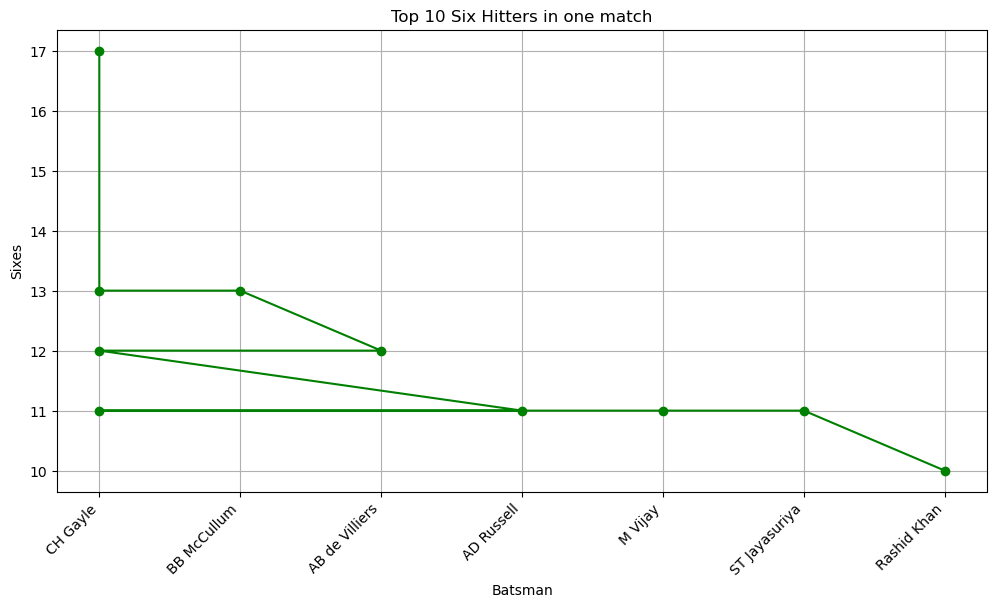

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'player_name' and 'sixes' are the relevant columns
top_sixes_hitters = batting_data.nlargest(10, 'sixes')

# Print the results
print("Top 10 Six Hitters in one match:")
print(top_sixes_hitters[['name', 'sixes']])

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(top_sixes_hitters['name'], top_sixes_hitters['sixes'], marker='o', linestyle='-', color='green')
plt.xlabel('Batsman')
plt.ylabel('Sixes')
plt.title('Top 10 Six Hitters in one match')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

In [36]:
import pandas as pd

# Filter data for the 2023 season
ipl_2023 = batting_data[batting_data['season'] == 2023]

# Group data by player and count sixes
sixes_by_player = ipl_2023.groupby('name')['sixes'].sum().sort_values(ascending=False)

# Get the top 10 players
top_10_sixes = sixes_by_player.head(10)

# Print the results
print("Top 10 Six-Hitters in IPL 2023:")
print(top_10_sixes)

Top 10 Six-Hitters in IPL 2023:
name
F du Plessis    36.0
S Dube          35.0
Shubman Gill    33.0
GJ Maxwell      31.0
RD Gaikwad      30.0
RK Singh        29.0
MP Stoinis      27.0
N Pooran        26.0
YBK Jaiswal     26.0
H Klaasen       25.0
Name: sixes, dtype: float64


Top 10 Six Hitters in one match:
                 name  sixes
10084        CH Gayle   17.0
11757        CH Gayle   13.0
14826     BB McCullum   13.0
7550   AB de Villiers   12.0
8392         CH Gayle   12.0
5145       AD Russell   11.0
5322         CH Gayle   11.0
13474         M Vijay   11.0
15380   ST Jayasuriya   11.0
915       Rashid Khan   10.0


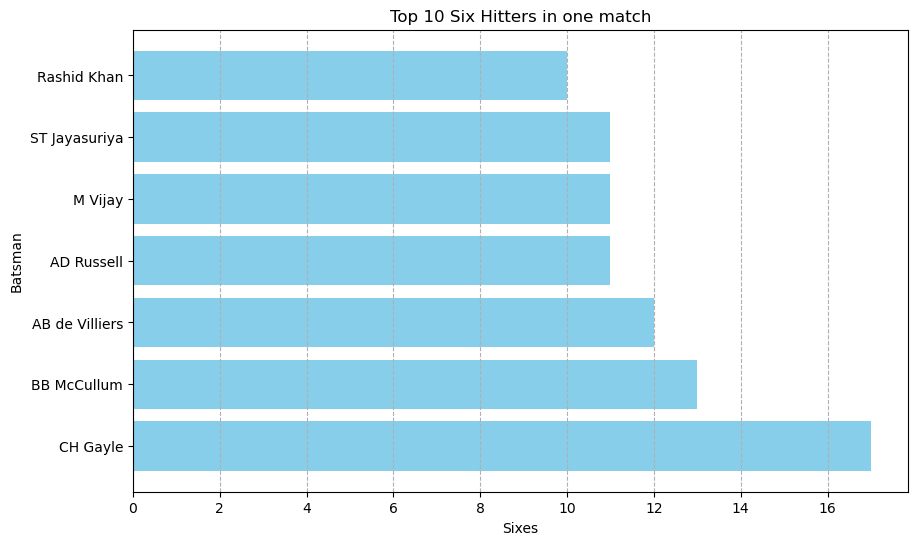

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'player_name' and 'sixes' are the relevant columns
top_sixes_hitters = batting_data.nlargest(10, 'sixes')

# Print the results
print("Top 10 Six Hitters in one match:")
print(top_sixes_hitters[['name', 'sixes']])

# Create a bar chart with horizontal orientation
plt.figure(figsize=(10, 6))
plt.barh(top_sixes_hitters['name'], top_sixes_hitters['sixes'], color='skyblue')
plt.xlabel('Sixes')
plt.ylabel('Batsman')
plt.title('Top 10 Six Hitters in one match')
plt.grid(axis='x', linestyle='--')
plt.show()

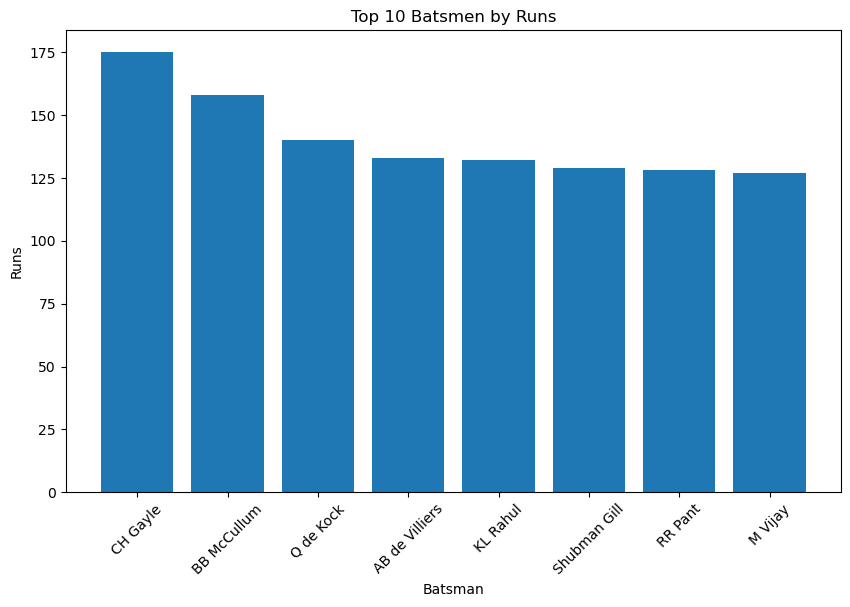

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'top_10_batsmen_by_runs'
# ... (replace with your DataFrame name)

# Sort the DataFrame by runs in descending order (optional if not already sorted)
top_10_batsmen_by_runs = top_10_batsmen_by_runs.sort_values('runs', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsmen_by_runs['name'], top_10_batsmen_by_runs['runs'])

# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Batsmen by Runs')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [38]:
import pandas as pd



last_season =  batting_data[ batting_data['season'] == 2023]



# Group data by player and count runs

runs_by_player = last_season.groupby('name')['runs'].sum().sort_values(ascending=False)



# Get the top 10 players

top_10_batsmen = runs_by_player.head(10)



# Print the results

print("Top 10 Batsmen in the Last IPL Season:")

print(top_10_batsmen)

Top 10 Batsmen in the Last IPL Season:
name
Shubman Gill    890.0
F du Plessis    730.0
DP Conway       672.0
V Kohli         639.0
YBK Jaiswal     625.0
RD Gaikwad      590.0
SA Yadav        562.0
DA Warner       470.0
RK Singh        456.0
C Green         451.0
Name: runs, dtype: float64


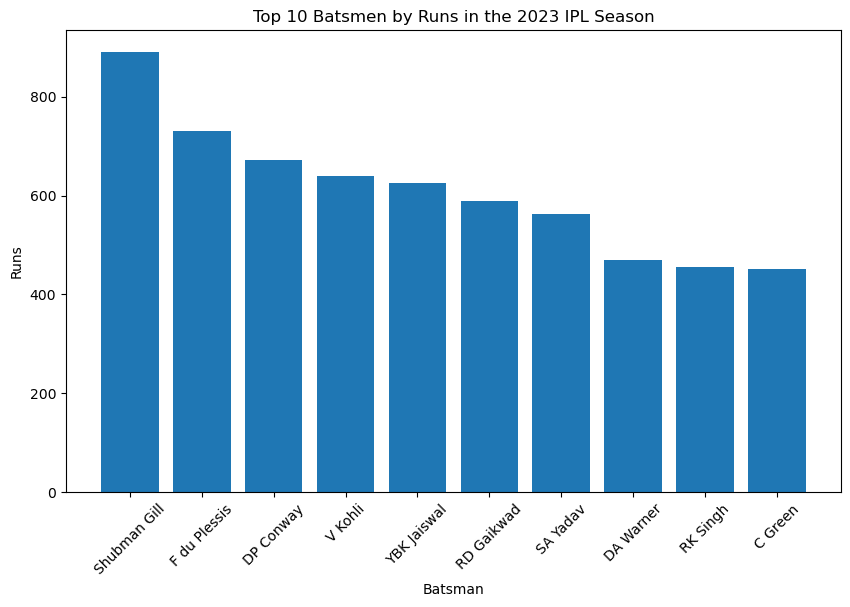

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsmen.index, top_10_batsmen.values)

# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Batsmen by Runs in the 2023 IPL Season')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Show the plot
plt.show()

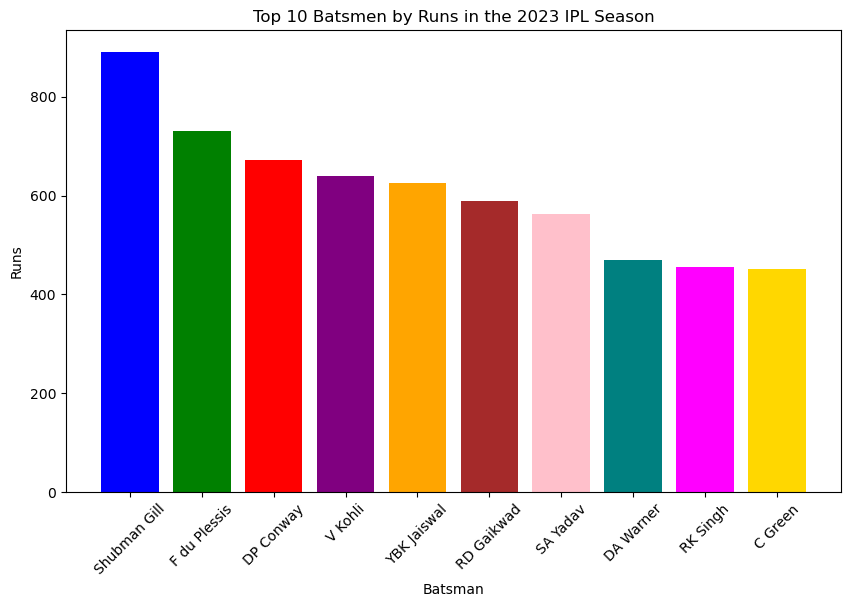

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'player_name' and 'runs' are the relevant columns
top_10_batsmen = batting_data[batting_data['season'] == 2023].groupby('name')['runs'].sum().sort_values(ascending=False).head(10)

# Create a list of colors (you can adjust the color names or use color codes)
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'teal', 'fuchsia', 'gold']

# Create a bar chart with different colors
plt.figure(figsize=(10, 6))
plt.bar(top_10_batsmen.index, top_10_batsmen.values, color=colors[:10])  # Limit colors to top 10

# Add labels and title
plt.xlabel('Batsman')
plt.ylabel('Runs')
plt.title('Top 10 Batsmen by Runs in the 2023 IPL Season')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'batting_data'

# Convert relevant columns to numeric with error handling
batting_data['runs'] = pd.to_numeric(batting_data['runs'], errors='coerce')
batting_data['ballsFaced'] = pd.to_numeric(batting_data['ballsFaced'], errors='coerce')
batting_data['strikeRate'] = pd.to_numeric(batting_data['strikeRate'], errors='coerce')

# Handle NaN values (if needed)
batting_data = batting_data.dropna(subset=['runs', 'ballsFaced', 'strikeRate'])  # Remove rows with NaN

# Take player's name as input from the user
player_name = input("Enter the player's name: ")  # User inputs the player's name

# Filter data for the player
player_data = batting_data[batting_data['fullName'] == player_name]

if player_data.empty:
    print(f"No data found for player: {player_name}")
else:
    # Get relevant statistics
    runs_scored = player_data['runs'].sum()
    highest_score = player_data['runs'].max()
    matches_played = player_data['match_id'].nunique()
    average_score = player_data['runs'].mean()
    strike_rate = player_data['strikeRate'].mean()

    # Print the results
    print(f"{player_name}'s Performance:")
    print(f"Runs Scored: {runs_scored}")
    print(f"Highest Score: {highest_score}")
    print(f"Matches Played: {matches_played}")
    print(f"Average Score: {average_score:.2f}")
    print(f"Strike Rate: {strike_rate:.2f}")


Enter the player's name: Virat Kohli
Virat Kohli's Performance:
Runs Scored: 7263.0
Highest Score: 113.0
Matches Played: 229
Average Score: 31.72
Strike Rate: 114.97


In [17]:
import pandas as pd

# Assuming you have a DataFrame named 'batting_data'

# Convert relevant columns to numeric with error handling
batting_data['runs'] = pd.to_numeric(batting_data['runs'], errors='coerce')
batting_data['ballsFaced'] = pd.to_numeric(batting_data['ballsFaced'], errors='coerce')
batting_data['strikeRate'] = pd.to_numeric(batting_data['strikeRate'], errors='coerce')

# Handle NaN values (if needed)
# batting_data = batting_data.dropna(subset=['runs', 'ballsFaced', 'strikeRate'])  # Remove rows with NaN

# Specify the player's name
player_name = 'Virat Kohli'  # Replace with the desired player name

# Filter data for the player
player_data = batting_data[batting_data['fullName'] == player_name]

# Get relevant statistics
runs_scored = player_data['runs'].sum()
highest_score = player_data['runs'].max()
matches_played = player_data['match_id'].nunique()
average_score = player_data['runs'].mean()
strike_rate = player_data['strikeRate'].mean()

# Print the results
print(f"{player_name}'s Performance:")
print(f"Runs Scored: {runs_scored}")
print(f"Highest Score: {highest_score}")
print(f"Matches Played: {matches_played}")
print(f"Average Score: {average_score:.2f}")
print(f"Strike Rate: {strike_rate:.2f}")

Virat Kohli's Performance:
Runs Scored: 7263.0
Highest Score: 113.0
Matches Played: 229
Average Score: 31.72
Strike Rate: 114.97


In [30]:
# Convert relevant columns to numeric types
batting_data['strikeRate'] = pd.to_numeric(batting_data['strikeRate'], errors='coerce')
batting_data['runningScore'] = pd.to_numeric(batting_data['runningScore'], errors='coerce')
batting_data['batting_average'] = pd.to_numeric(batting_data['batting_average'], errors='coerce')

# Function to predict match outcome based on simple rules
def predict_match_outcome(row):
    # Use simple rules to predict the match outcome
    if row['current_innings'] == 2:
        # Team batting second is chasing, check if the score is close
        if row['runningScore'] >= 200 and row['strikeRate'] >= 130:
            return "Likely to win"
        else:
            return "Likely to lose"
    else:
        # Team batting first, check if the score is high enough
        if row['runningScore'] >= 280:
            return "Strong position"
        else:
            return "Needs more runs"
    
# Apply the prediction function to each row
batting_data['predicted_outcome'] = batting_data.apply(predict_match_outcome, axis=1)

# Display the updated DataFrame with predictions
batting_data[['match_name', 'home_team', 'away_team', 'runningScore', 'strikeRate', 'predicted_outcome']]

,match_name,home_team,away_team,runningScore,strikeRate,predicted_outcome
0,GT v CSK,GT,CSK,NaN,16.66,Needs more runs
1,GT v CSK,GT,CSK,NaN,184.00,Needs more runs
2,GT v CSK,GT,CSK,NaN,135.29,Needs more runs
3,GT v CSK,GT,CSK,NaN,116.66,Needs more runs
4,GT v CSK,GT,CSK,NaN,100.00,Needs more runs
...,...,...,...,...,...,...
15715,CSK v RR,CSK,RR,NaN,143.58,Needs more runs
15716,CSK v RR,CSK,RR,NaN,133.33,Needs more runs
15717,CSK v RR,CSK,RR,NaN,0.00,Needs more runs
15718,CSK v RR,CSK,RR,NaN,100.00,Needs more runs


In [42]:
import pandas as pd
df= pd.read_csv("all_season_summary.csv")

In [40]:
ipl_data

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2023.0,1359475,Gujarat Titans v Chennai Super Kings,NaN,"1st Match (N), Indian Premier League at Ahmeda...",GT,CSK,GT,BOWL FIRST,178/7,...,"Wriddhiman Saha (WK),Shubman Gill (UKN),Sai Su...","Devon Conway (UKN),Ruturaj Gaikwad (UKN),Moeen...","Ruturaj Gaikwad,Moeen Ali","Rajvardhan Hangargekar,Ravindra Jadeja",31 March 2023 - night match (20-over match),Saiyed Khalid,Nitin Menon,Virender Sharma,Javagal Srinath,Abhijit Bengeri
1,2023.0,1359476,Punjab Kings v Kolkata Knight Riders,NaN,"2nd Match (D/N), Indian Premier League at Chan...",PBKS,KKR,KKR,BOWL FIRST,191/5,...,"Prabhsimran Singh (UKN),Shikhar Dhawan (UKN),B...","Mandeep Singh (AR),Rahmanullah Gurbaz (WK),Anu...","Andre Russell,Venkatesh Iyer","Tim Southee,Varun Chakravarthy",01 April 2023 - day/night match (20-over match),Yeshwant Barde,Bruce Oxenford,Jayaraman Madanagopal,Manu Nayyar,Pranav Joshi
2,2023.0,1359477,Lucknow Super Giants v Delhi Capitals,NaN,"3rd Match (N), Indian Premier League at Luckno...",LSG,DC,DC,BOWL FIRST,193/6,...,"KL Rahul (UKN),Kyle Mayers (AR),Deepak Hooda (...","Prithvi Shaw (UKN),David Warner (UKN),Mitchell...","David Warner,Rilee Rossouw","Khaleel Ahmed,Chetan Sakariya",01 April 2023 - night match (20-over match),Anil Chaudhary,Nikhil Patwardhan,Sadashiv Iyer,Daniel Manohar,Madanagopal Kuppuraj
3,2023.0,1359478,Sunrisers Hyderabad v Rajasthan Royals,NaN,"4th Match (D/N), Indian Premier League at Hyde...",SRH,RR,SRH,BOWL FIRST,203/5,...,"Abhishek Sharma (AR),Mayank Agarwal (UKN),Rahu...","Yashasvi Jaiswal (UKN),Jos Buttler (UKN),Sanju...","Sanju Samson,Yashasvi Jaiswal","Yuzvendra Chahal,Trent Boult",02 April 2023 - day/night match (20-over match),KN Ananthapadmanabhan,Rohan Pandit,Navdeep Singh,Narayanan Kutty,Abhijit Bhattacharya
4,2023.0,1359479,Royal Challengers Bangalore v Mumbai Indians,NaN,"5th Match (N), Indian Premier League at Bengal...",RCB,MI,RCB,BOWL FIRST,171/7,...,"Virat Kohli (UKN),Faf du Plessis (UKN),Dinesh ...","Rohit Sharma (UKN),Ishan Kishan (WK),Cameron G...","Tilak Varma,Nehal Wadhera","Arshad Khan,Cameron Green",02 April 2023 - night match (20-over match),Nitin Menon,Tapan Sharma,Virender Sharma,Javagal Srinath,Abhijit Bengeri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027,2008.0,336012,Royal Challengers Bangalore v Mumbai Indians,NaN,"55th match (D/N), Indian Premier League at Ben...",RCB,MI,MI,BOWL FIRST,122/9,...,"Mark Boucher (BT),Shreevats Goswami (WK),Misba...","Sanath Jayasuriya (AR),Sachin Tendulkar (BT),R...","Sanath Jayasuriya,Sachin Tendulkar","Dilhara Fernando,Dwayne Smith",28 May 2008 - day/night match (20-over match),Billy Bowden,Arani Jayaprakash,Billy Doctrove,Sir Clive Lloyd,NaN
1028,2008.0,336019,Kings XI Punjab v Rajasthan Royals,NaN,"56th match (N), Indian Premier League at Mohal...",KXIP,RR,RR,BOWL FIRST,221/3,...,"Shaun Marsh (BT),James Hopes (AR),Yuvraj Singh...","Mohammad Kaif (BT),Niraj Patel (UKN),Younis Kh...","Niraj Patel,Yusuf Pathan","Shane Watson,Yusuf Pathan",28 May 2008 - night match (20-over match),Krishna Hariharan,Steve Davis,Daryl Harper,Srinivas Venkataraghavan,MS Mahal
1029,2008.0,336038,Delhi Daredevils v Rajasthan Royals,NaN,"1st Semi-Final (N), Indian Premier League at M...",DC,RR,DC,BOWL FIRST,192/9,...,"Gautam Gambhir (BT),Virender Sehwag (BT),Shikh...","Graeme Smith (BT),Swapnil Asnodkar (BT),Sohail...","Shane Watson,Yusuf Pathan","Shane Watson,Munaf Patel",30 May 2008 - night match (20-over match),Billy Bowden,Rudi Koertzen,Billy Doctrove,Javagal Srinath,NaN
1030,2008.0,336039,Chennai Super Kings v Kings XI Punjab,NaN,"2nd Semi-Final (N), Indian Premier League at M...",CSK,KXIP,KXIP,BAT FIRST,112/8,...,"Parthiv Patel (WK),Vidyut Sivaramakrishnan (UK...","Shaun Marsh (BT),James Hopes (AR),Kumar Sangak...","Ramesh Pow

In [43]:
def calculate_home_win_rate(home_team):
    # Total matches played at home
    total_home_matches = len(df[df['home_team'] == home_team])
    # Matches won at home
    home_wins = len(df[(df['home_team'] == home_team) & (df['winner'] == home_team)])
    
    if total_home_matches > 0:
        win_rate = home_wins / total_home_matches
    else:
        win_rate = 0.5 
    return win_rate

home_team = input("Enter the home team: ")
away_team = input("Enter the away team: ")


home_win_probability = calculate_home_win_rate(home_team)

if home_win_probability > 0.5:
    predicted_winner = home_team
else:
    predicted_winner = away_team

print(f"Predicted Winner: {predicted_winner}")

Enter the home team: Sunrisers hydrabad
Enter the away team: rajsthan royal
Predicted Winner: rajsthan royal


In [46]:
def calculate_toss_win_rate(toss_won_team, decision):
    total_matches = len(df[(df['toss_won'] == toss_won_team) & (df['decision'] == decision)])
    wins_after_toss = len(df[(df['toss_won'] == toss_won_team) & (df['decision'] == decision) & (df['winner'] == toss_won_team)])
    
    if total_matches > 0:
        win_rate = wins_after_toss / total_matches
    else:
        win_rate = 0.5  
    
    return win_rate

home_team = input("Enter the home team: ")
away_team = input("Enter the away team: ")
toss_won = input("Enter the team that won the toss: ")
decision = input("Enter the decision made by the toss winner (Bat/Field): ")

toss_win_rate = calculate_toss_win_rate(toss_won, decision)

if toss_win_rate > 0.5:
    predicted_winner = toss_won  
else:
    predicted_winner = home_team if toss_won != home_team else away_team 

print(f"Predicted Winner: {predicted_winner}")

Enter the home team: mumbai indians
Enter the away team: rajsthan royals
Enter the team that won the toss: mumbai indians
Enter the decision made by the toss winner (Bat/Field): field
Predicted Winner: rajsthan royals


In [48]:
ipl_data = pd.DataFrame(ipl_data)
# Group data by team and calculate relevant statistics
team_stats = ipl_data.groupby('name')[['short_name', 'winner', 'toss_won', 'home_score', 'points']].sum().reset_index()

# Calculate win percentage
team_stats['win_percentage'] = (team_stats['winner'] / team_stats['short_name']) * 100

# Sort teams by win percentage in descending order
team_stats = team_stats.sort_values('home_score', ascending=False)

# Print team statistics
("Team Statistics:")
(team_stats)

,name,short_name,winner,toss_won,home_score,points,win_percentage
128,Pune Warriors v Kings XI Punjab,0.0,0.0,PWIPWIKXIP,99/9166/6113/3,"Kings XI Punjab 2, Pune Warriors 0Pune Warrior...",NaN
80,Kochi Tuskers Kerala v Rajasthan Royals,0.0,0.0,Kochi,98/2,"Kochi Tuskers Kerala 2, Rajasthan Royals 0",NaN
160,Rising Pune Supergiant v Kings XI Punjab,0.0,0.0,RPS,78/1,"Rising Pune Supergiant 2, Kings XI Punjab 0",NaN
165,Rising Pune Supergiants v Delhi Daredevils,0.0,0.0,RPS,76/1,"Rising Pune Supergiants 2, Delhi Daredevils 0",NaN
76,Kochi Tuskers Kerala v Deccan Chargers,0.0,0.0,Kochi,74,"Deccan Chargers 2, Kochi Tuskers Kerala 0",NaN
...,...,...,...,...,...,...,...
106,Lucknow Super Giants v Royal Challengers Banga...,0.0,0.0,RCBLSGLSG,108163/8193/6,"Royal Challengers Bangalore 2, Lucknow Super G...",NaN
134,Pune Warriors v Sunrisers Hyderabad,0.0,0.0,PWI,108,"Sunrisers Hyderabad 2, Pune Warriors 0",NaN
158,Rising Pune Supergiant v Delhi Daredevils,0.0,0.0,RPS,108,"Delhi Daredevils 2, Rising Pune Supergiant 0",NaN
130,Pune Warriors v Kolkata Knight Riders,0.0,0.0,KKRKKRKKR,106102/8118/7,"Kolkata Knight Riders 2, Pune Warriors 0Kolkat...",NaN


In [51]:
team_wins = df['winner'].value_counts().reset_index()
team_wins.columns = ['Team', 'Wins']

In [52]:
def get_top_11_players(team, df):
    # Filter the dataset for the selected team (either as home or away team)
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    
       players = pd.concat([team_matches['home_captain'], team_matches['away_captain'], team_matches['pom']])
    
    # Count player appearances and performance in matches
    top_players = players.value_counts().head(11).reset_index()
    top_players.columns = ['Player', 'Performance_Count']

    return top_players

# Input: Teams selected by the user
team1 = input("Enter the first team name: ")
team2 = input("Enter the second team name: ")

# Get the top 11 players for each team
top_11_team1 = get_top_11_players(team1, df)
top_11_team2 = get_top_11_players(team2, df)

# Display the top 11 players for both teams
print(f"Top 11 players for {team1}:")
print(top_11_team1)

print(f"\nTop 11 players for {team2}:")
print(top_11_team2)

Enter the first team name: mumbai indians
Enter the second team name: rajsthan royals
Top 11 players for mumbai indians:
Empty DataFrame
Columns: [Player, Performance_Count]
Index: []

Top 11 players for rajsthan royals:
Empty DataFrame
Columns: [Player, Performance_Count]
Index: []


In [55]:
import pandas as pd

# Normalize team names and other relevant columns by converting to lowercase and stripping spaces
df['home_team'] = df['home_team'].str.lower().str.strip()
df['away_team'] = df['away_team'].str.lower().str.strip()
df['home_captain'] = df['home_captain'].str.lower().str.strip()
df['away_captain'] = df['away_captain'].str.lower().str.strip()
df['pom'] = df['pom'].str.lower().str.strip()

# Function to get top 11 players for a selected team
def get_top_11_players(team, df):
    # Filter the dataset for the selected team (either as home or away team)
    team_matches = df[(df['home_team'] == team) | (df['away_team'] == team)]
    
    if team_matches.empty:
        print(f"No matches found for team: {team}")
        return pd.DataFrame(columns=['Player', 'Performance_Count'])

    # Combine player data from home captain, away captain, and player of the match (pom)
    players = pd.concat([team_matches['home_captain'], team_matches['away_captain'], team_matches['pom']])

    # Drop missing player names if any
    players = players.dropna()

    # Count player appearances and performance
    top_players = players.value_counts().head(11).reset_index()
    top_players.columns = ['Player', 'Performance_Count']

    return top_players

# Input: Teams selected by the user
team1 = input("Enter the first team name: ").lower().strip()  # Normalize user input
team2 = input("Enter the second team name: ").lower().strip()  # Normalize user input

# Get the top 11 players for each team
top_11_team1 = get_top_11_players(team1, df)
top_11_team2 = get_top_11_players(team2, df)

# Display the top 11 players for both teams
print(f"Top 11 players for {team1.capitalize()}:")
print(top_11_team1)

print(f"\nTop 11 players for {team2.capitalize()}:")
print(top_11_team2)


Enter the first team name: mi
Enter the second team name: rr
Top 11 players for Mi:
              Player  Performance_Count
0       rohit sharma                175
1   sachin tendulkar                 60
2           ms dhoni                 37
3    harbhajan singh                 26
4     kieron pollard                 20
5        virat kohli                 20
6     gautam gambhir                 19
7       steven smith                 12
8       david warner                 11
9    virender sehwag                 10
10      shreyas iyer                 10

Top 11 players for Rr:
             Player  Performance_Count
0       shane warne                 61
1      sanju samson                 52
2      rahul dravid                 38
3    ajinkya rahane                 34
4      shane watson                 32
5          ms dhoni                 30
6      steven smith                 29
7       virat kohli                 17
8      rohit sharma                 16
9    gautam gambhir   

In [21]:
import pandas as pd

# Assuming you have a DataFrame named 'ipl_data' containing IPL data

def get_top_batsmen(team_name, season):
    """
    Gets the top 10 batsmen for a given team and season.

    Args:
        team_name (str): The name of the team.
        season (int): The year of the season.

    Returns:
        pandas.DataFrame: A DataFrame containing the top 10 batsmen for the specified team and season.
    """

    # Filter data for the specified team and season
    team_data = batting_data[(batting_data['home_team'] == team_name) & (batting_data['season'] == season)]

    # Group data by player and count runs
    runs_by_player = team_data.groupby('name')['runs'].sum().sort_values(ascending=False)

    # Get the top 10 batsmen
    top_10_batsmen = runs_by_player.head(10)

    return top_10_batsmen

# Get team name and season year from the user
team_name = input("Enter the team name: ")
season = int(input("Enter the season year: "))

# Get top batsmen for the specified team and season
top_batsmen = get_top_batsmen(team_name, season)

# Print the results
print(f"Top 10 Batsmen for {team_name} in {season}:")
print(top_batsmen)

Enter the team name: MI
Enter the season year: 2023
Top 10 Batsmen for MI in 2023:
name
SA Yadav          324.0
C Green           228.0
RG Sharma         160.0
Ishan Kishan      148.0
YBK Jaiswal       124.0
TH David          106.0
MA Agarwal         83.0
Rashid Khan        79.0
Vivrant Sharma     69.0
GJ Maxwell         68.0
Name: runs, dtype: float64
